This notebook explores the environmental time series data in relation to extreme events.
The goal is to better understand trends, variability, and basic statistics in python.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
dates = pd.date_range("2010-01-01", periods=200)
rainfall = np.random.gamma(shape=2, scale=3, size=200)

dataframe = pd.DataFrame ({
    "date": dates,
    "rainfall_mm": rainfall
})

dataframe.head()

,date,rainfall_mm
0,2010-01-01,3.161037
1,2010-01-02,6.011677
2,2010-01-03,3.448013
3,2010-01-04,8.363629
4,2010-01-05,0.724854


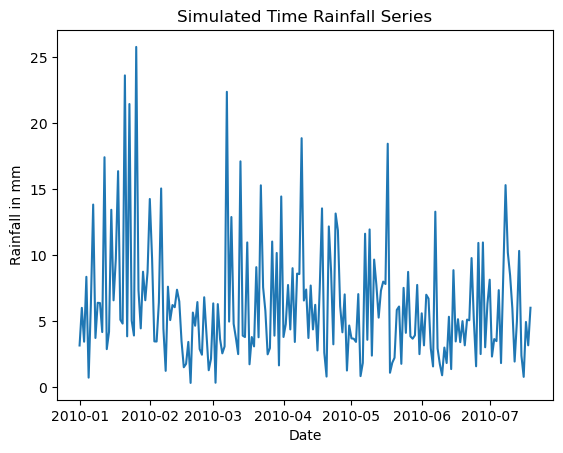

In [5]:
plt.figure()
plt.plot(dataframe["date"], dataframe["rainfall_mm"])
plt.title("Simulated Time Rainfall Series")
plt.xlabel("Date")
plt.ylabel("Rainfall in mm")
plt.show()

I begin by computing basic statistics to understand the distribution and variability of the rainfall values.

In [6]:
dataframe["rainfall_mm"].describe()

count    200.000000
mean       6.248966
std        4.552454
min        0.325112
25%        3.173367
50%        5.056131
75%        7.766447
max       25.779127
Name: rainfall_mm, dtype: float64

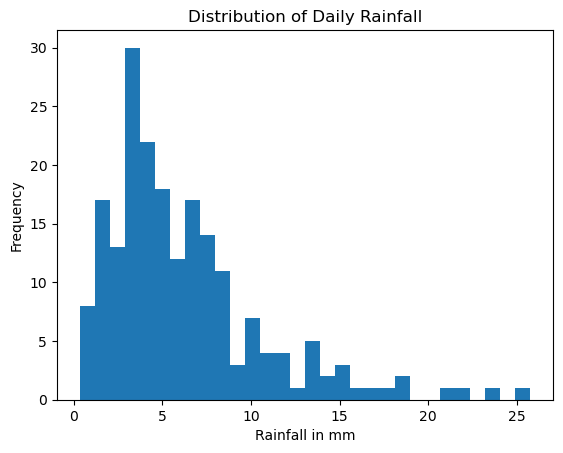

In [7]:
plt.figure()
plt.hist(dataframe["rainfall_mm"], bins=30)
plt.xlabel("Rainfall in mm")
plt.ylabel("Frequency")
plt.title("Distribution of Daily Rainfall")
plt.show()

Extreme rainfall events are defined as rainfall above the 95th percentile of the rainfall distribution.

In [10]:
threshold = dataframe["rainfall_mm"].quantile(0.95)
threshold

dataframe["is_extreme"] = dataframe["rainfall_mm"] > threshold
dataframe[dataframe["is_extreme"]].head()
dataframe["is_extreme"].value_counts()


is_extreme
False    190
True      10
Name: count, dtype: int64

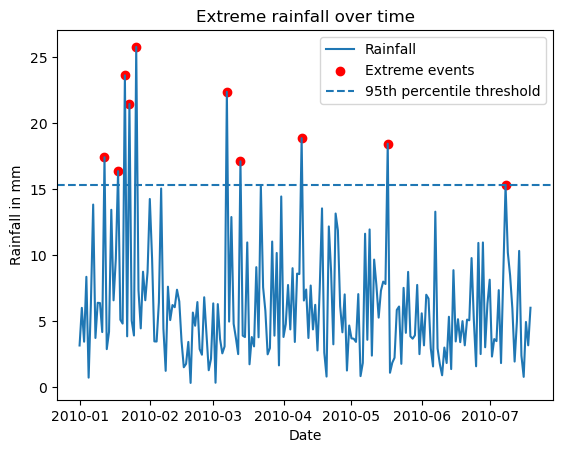

In [11]:
plt.figure()
plt.plot(dataframe["date"], dataframe["rainfall_mm"], label="Rainfall")

plt.scatter(
    dataframe.loc[dataframe["is_extreme"], "date"],
    dataframe.loc[dataframe["is_extreme"], "rainfall_mm"],
    color="red",
    label="Extreme events"
    )
plt.axhline(threshold, linestyle="--", label="95th percentile threshold")

plt.legend()
plt.xlabel("Date")
plt.ylabel("Rainfall in mm")
plt.title("Extreme rainfall over time")
plt.show()

I compute rolling averages to smooth out the rainfall time series and identify periods of potential droughts (low rainfall) using a threshold based on the 5th percentile.

In [12]:
dataframe["rainfall_7day_avg"] = dataframe["rainfall_mm"].rolling(window=7).mean()
dataframe[["date", "rainfall_mm", "rainfall_7day_avg"]].head(15)

,date,rainfall_mm,rainfall_7day_avg
0,2010-01-01,3.161037,NaN
1,2010-01-02,6.011677,NaN
2,2010-01-03,3.448013,NaN
3,2010-01-04,8.363629,NaN
4,2010-01-05,0.724854,NaN
5,2010-01-06,6.361051,NaN
6,2010-01-07,13.837384,5.986806
7,2010-01-08,3.731071,6.068240
8,2010-01-09,6.395911,6.123130
9,2010-01-10,6.376672,6.541510


In [18]:
drought_threshold = dataframe["rainfall_7day_avg"].quantile(0.05)
dataframe["is_drought"] = dataframe["rainfall_7day_avg"] < drought_threshold
dataframe[dataframe["is_drought"]].head()

,date,rainfall_mm,is_extreme,rainfall_7day_avg,is_drought
49,2010-02-19,0.325112,False,3.486221,True
50,2010-02-20,5.655626,False,3.239233,True
51,2010-02-21,4.659029,False,2.975954,True
52,2010-02-22,6.451661,False,3.400345,True
60,2010-03-02,0.339394,False,3.342787,True


In [19]:
dataframe["is_drought"].value_counts()

is_drought
False    190
True      10
Name: count, dtype: int64

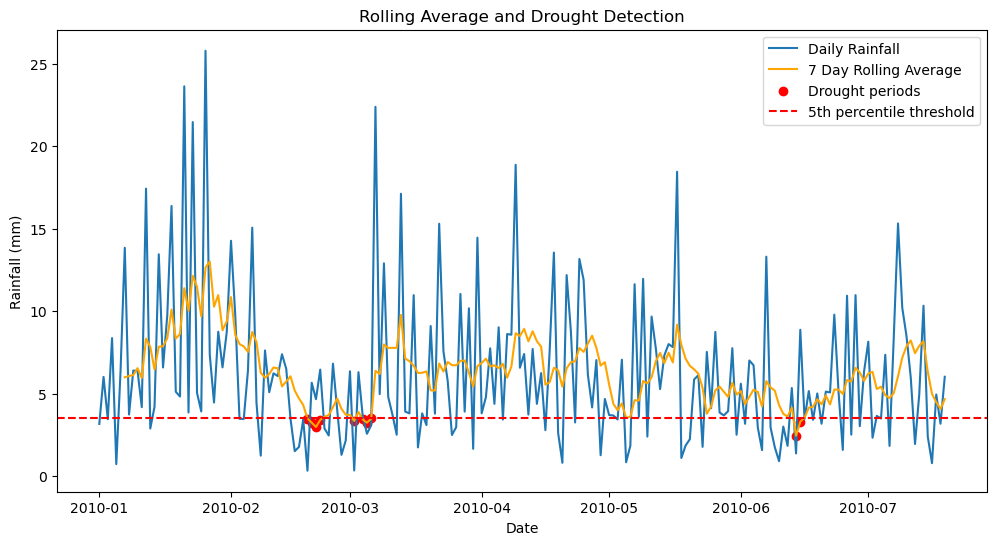

In [23]:
plt.figure(figsize=[12,6])
plt.plot(dataframe["date"], dataframe["rainfall_mm"], label="Daily Rainfall")
plt.plot(dataframe["date"], dataframe["rainfall_7day_avg"], color="orange", label="7 Day Rolling Average")

plt.scatter(
    dataframe.loc[dataframe["is_drought"], "date"],
    dataframe.loc[dataframe["is_drought"], "rainfall_7day_avg"],
    color="red",
    label="Drought periods"
)

plt.axhline(drought_threshold, linestyle="--", color="red", label="5th percentile threshold")
plt.xlabel("Date")
plt.ylabel("Rainfall (mm)")
plt.title("Rolling Average and Drought Detection")
plt.legend()
plt.show()